# JUPYTER NOTEBOOK

In [1]:
import numpy as np
import time
from src.params import get_params

params = get_params()

In [2]:
print "Numero de clusters:", params['descriptor_size']
print "Tipo de Descriptor:",params['descriptor_type']
print "Tipo de los puntos clave:", params['keypoint_type']
print "Dimensiones máximas de la imágen:", params['max_size']
print "Tipo de distancia calculada:", params['distance_type']

Numero de clusters: 512
Tipo de Descriptor: SIFT
Tipo de los puntos clave: SIFT
Dimensiones máximas de la imágen: 500
Tipo de distancia calculada: euclidean


## Extracción de características de la imágen

In [3]:
import src.get_features as GF

In [4]:
params['split'] = 'train'

t = time.time()
X, pca, scaler = GF.stack_features(params)

print "Hecho. Tiempo de extraccion de características:", time.time() - t

Hecho. Tiempo de extraccion de características: 238.42804718


## Entrenamiento del codebook

In [8]:
t = time.time()
GF.train_codebook(params,X)

print "Realizado. Tiempo de entrenamiento" ,time.time() - t

Realizado. Tiempo de entrenamiento 9.82065606117


## Assignments y Bag of Words

In [9]:
t = time.time()
GF.get_features(params)

print "Realizado. Tiempo del set de entrenamiento:", time.time() - t
# Switch to validation set
params['split'] = 'val'

t = time.time()
# Run again
GF.get_features(params)

print "Realizado. Tiempo del set de validación:", time.time() - t

Realizado. Tiempo del set de entrenamiento: 211.98132205
Realizado. Tiempo del set de validación: 84.4933180809


## Generación de Rankings

In [10]:
from src.rank import *

In [11]:
print "Haciendo los rankings..."
t = time.time()
rank(params)
print "Hechos!"
print "Tiempo para hacerlos:", time.time() - t

Haciendo los rankings...
Hechos!
Tiempo para hacerlos: 0.910360097885


## Evaluación Cuantitativa

In [18]:
import src.eval_rankings as ER


In [13]:
ap_list, dict_ = ER.eval_rankings(params)

In [14]:
print "Mean Average Precision", np.mean(ap_list)

Mean Average Precision 0.27818890254


In [16]:
for id in dict_.keys():
    
    if not id == 'desconocido':
        print id, dict_[id]/10
# Dividimos entre 10 porque hay 10 imágenes de cada edificio en la carpeta val.
        

mercat_independencia 0.267190400831
societat_general 0.213827538364
desconegut 0
farmacia_albinyana 0.483489293565
ajuntament 0.82330506317
mnactec 0.17943579487
escola_enginyeria 0.205345874073
masia_freixa 0.108794024371
castell_cartoixa 0.236801986942
dona_treballadora 0.0703253726685
catedral 0.211321951188
teatre_principal 0.398521206613
estacio_nord 0.139908323823


## Evaluación Cualitativa

ajuntament
450
Displaying...


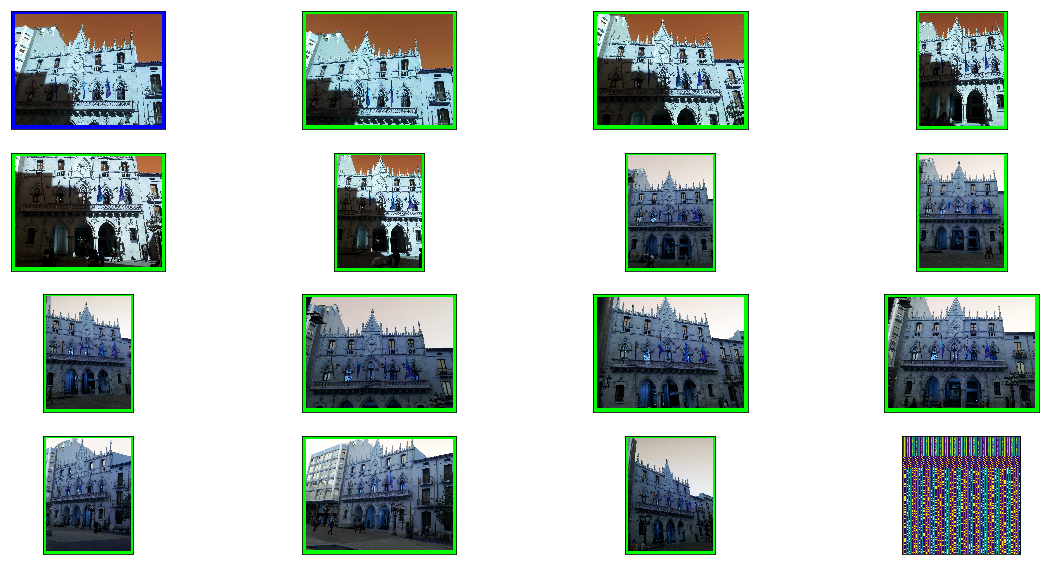

In [24]:
query_id = '29429-11804-13780.jpg'
ER.single_eval(params,query_id)

masia_freixa
450
Displaying...


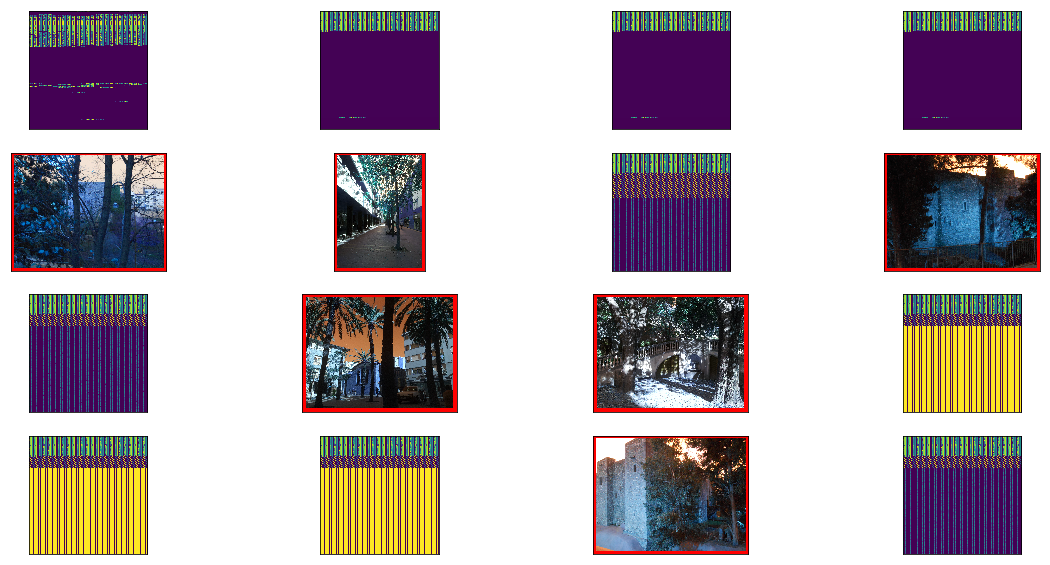

In [26]:
query_id = '13275-23968-19108.jpg'
ER.single_eval(params,query_id)